# Scaling from pools to wells
---

#### Overview

In this notebook we compare how motility metrics compared when cells were swimming in two different levels of confinement: agar microchambers (“pools”) or 384-well plates (“wells”). We look at the 

In [1]:
from pathlib import Path
from itertools import combinations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Load Motility Metrics
---

Load summary motility metrics from all cells swimming in pools generated in `1_Compute...`.

#### Datasets
```
1. AMID04 :: 01 March 2024
1. AMID05 :: 01 March 2024
```

#### Experimental parameters
| strain  | substrate      | position_in_tube | time_in_water |
|---------|----------------|------------------|---------------|
| cc1373  | pools          | top              | 4 hrs         |
|         | wells          | middle           | 21 hrs        |

#### Collect csv files

In [2]:
csv_files = {
    "AMID-04": Path("../data/AMID-04_summary_motility_metrics.csv"),
    "AMID-05": Path("../data/AMID-05_summary_motility_metrics.csv"),
}

motility_metrics_dataframe = pd.concat(
    [pd.read_csv(csv_file) for csv_file in csv_files.values()],
)

motility_metrics_dataframe.drop("slide_ID", axis=1).groupby("experiment_ID").head(4)

,total_time,total_distance,net_distance,max_sprint_length,confinement_ratio,mean_curvilinear_speed,mean_linear_speed,mean_angular_speed,num_rotations,num_direction_changes,pivot_rate,cell_count,experiment_ID,strain,substrate,position_in_tube,time_in_water,well_ID,timelapse_ID,pool_ID
0,10.452090,405.988485,53.390512,15.908359,0.131507,38.842804,5.108118,4.151206,0.0,27,0.066504,3,AMID-04,cc1373,pools,top,21,NaN,1.0,2x2
1,19.953990,512.993208,40.957943,9.852008,0.079841,25.708804,2.052619,2.376976,1.0,31,0.060430,1,AMID-04,cc1373,pools,top,21,NaN,1.0,2x3
2,10.702140,478.449134,68.669244,14.376490,0.143525,44.705931,6.416403,2.781357,2.0,21,0.043892,2,AMID-04,cc1373,pools,top,21,NaN,1.0,3x1
3,19.953990,925.335760,76.357094,14.874829,0.082518,46.373470,3.826658,2.660577,1.0,33,0.035663,1,AMID-04,cc1373,pools,top,21,NaN,1.0,3x2
0,19.954072,47.628602,31.877719,0.824480,0.669298,2.386911,1.597555,4.640156,0.0,84,1.763646,19,AMID-05,cc1373,wells,top,21,I02,NaN,NaN
1,19.954072,90.879026,32.830895,1.592052,0.361259,4.554410,1.645323,10.093640,1.0,133,1.463484,19,AMID-05,cc1373,wells,top,21,I02,NaN,NaN
2,19.954072,169.036297,38.048613,3.997798,0.225091,8.471268,1.906809,3.406205,4.0,44,0.260299,19,AMID-05,cc1373,wells,top,21,I02,NaN,NaN
3,19.954072,74.651114,43.324461,1.406703,0.580359,3.741147,2.171209,6.367813,0.0,130,1.741434,19,AMID-05,cc1373,wells,top,21,I02,NaN,NaN


## 1D Analysis
---

Select metrics for which to show univariate distributions.

In [3]:
# set metrics
metrics_subset = [
    # "max_sprint_length",
    "confinement_ratio",
    "mean_curvilinear_speed",
    # "mean_linear_speed",
    "mean_angular_speed",
    # "pivot_rate",
]

# set experimental variables
experimental_variables = [
    "substrate",
]

#### Split violin plots

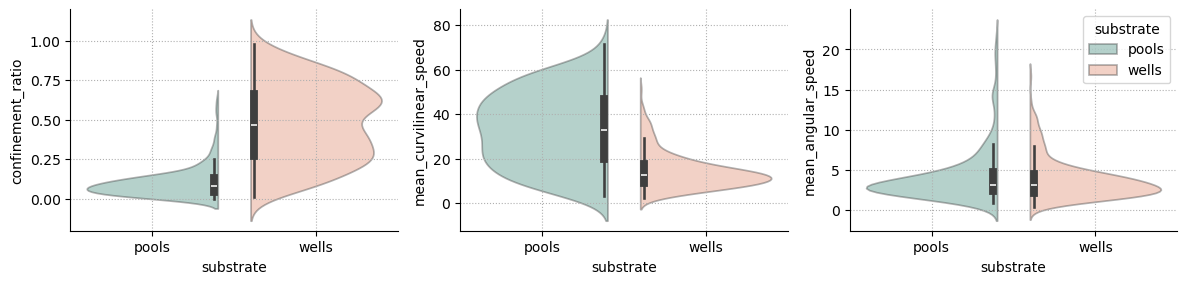

In [4]:
# loop through experimental variables
# (position in tube and time in water)
for variable in experimental_variables:
    # create figure
    ncols = len(metrics_subset)
    fig, axes = plt.subplots(
        ncols=ncols,
        figsize=(4 * ncols, 3),
    )

    # loop through select metrics
    for i, metric in enumerate(metrics_subset):
        last = len(metrics_subset) - 1
        legend = True if i == last else False
        ylabel = "Percent" if i == 0 else ""

        # render violin plot
        sns.violinplot(
            data=motility_metrics_dataframe,
            x=variable,
            y=metric,
            hue=variable,
            palette=["#3B9886", "#F28360"],
            inner="box",
            split=True,
            legend=legend,
            alpha=0.4,
            ax=axes.flat[i],
        )

        # aesthetics
        axes[i].grid(ls=":")
        sns.despine(ax=axes[i])

    # add space between subplots
    plt.tight_layout()

## 2D analysis
---

#### Select metrics for bivariate distributions

In [7]:
metrics_combinations = list(combinations(metrics_subset, 2))
metrics_combinations

[('confinement_ratio', 'mean_curvilinear_speed'),
 ('confinement_ratio', 'mean_angular_speed'),
 ('mean_curvilinear_speed', 'mean_angular_speed')]

#### Bivariate distributions

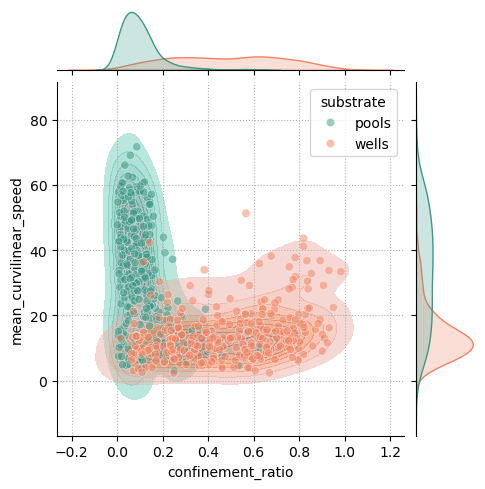

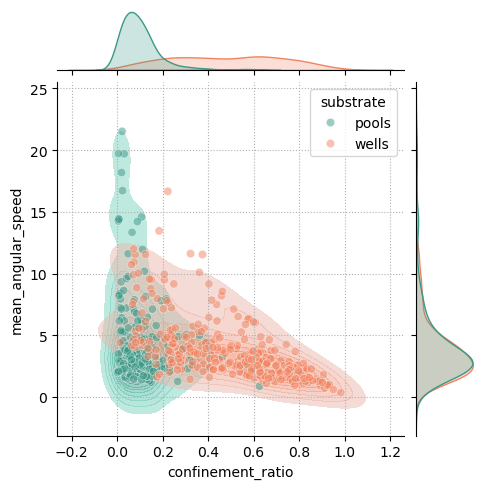

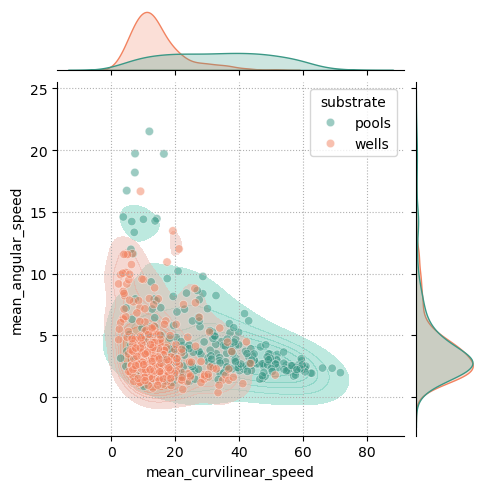

In [8]:
# loop through experimental variables
# (position in tube and time in water)
for variable in experimental_variables:
    # loop through combinations of metrics
    for metric_i, metric_j in metrics_combinations:
        # render joint distribution
        g = sns.JointGrid(
            data=motility_metrics_dataframe,
            x=metric_i,
            y=metric_j,
            hue=variable,
            palette=["#3B9886", "#F28360"],
            height=5,
        )

        # aesthetics
        g.plot_joint(sns.kdeplot, fill=True, alpha=0.5)
        g.plot_joint(sns.scatterplot, alpha=0.5, legend=True)
        g.plot_marginals(sns.kdeplot, fill=True, common_norm=False)
        g.ax_joint.grid(ls=":")